In [22]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import initializers
from keras import regularizers
from my_utils import utils_paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

# load the data 

x and y

In [ ]:
import pandas as pd 
df = pd.DataFrame()

In [12]:
data = []
labels = []

In [11]:
imagePaths = sorted(list(utils_paths.list_images('./dataset')))
len(imagePaths)

3000

In [9]:
random.seed(42)# 保证随机种子是一样的

In [10]:
random.shuffle(imagePaths)

In [13]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()#  拉长 
    data.append(image)
    
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [17]:
data = np.array(data, dtype='float') / 225.0
labels = np.array(labels)

In [23]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [24]:
# one hot decoding 
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [25]:
trainY

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [26]:
model = Sequential()

In [27]:
model.add(Dense(512, input_shape=(3072,), activation='relu'))
model.add(Dense(256, activation='relu',))
model.add(Dense(len(lb.classes_), activation='softmax',))

In [28]:
INIT_LR = 0.01
EPOCHS = 200

In [29]:
opt = SGD(lr=INIT_LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [30]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
             epochs=EPOCHS, batch_size=32)

Epoch 1/200
71/71 [==============================] - 1s 7ms/step - loss: 1.0532 - accuracy: 0.4337 - val_loss: 0.9997 - val_accuracy: 0.5200
Epoch 2/200
71/71 [==============================] - 0s 7ms/step - loss: 0.8630 - accuracy: 0.5610 - val_loss: 0.9879 - val_accuracy: 0.5053
Epoch 3/200
71/71 [==============================] - 0s 6ms/step - loss: 0.8218 - accuracy: 0.5736 - val_loss: 0.9596 - val_accuracy: 0.5347
Epoch 4/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7805 - accuracy: 0.6357 - val_loss: 0.8796 - val_accuracy: 0.5733
Epoch 5/200
71/71 [==============================] - 0s 6ms/step - loss: 0.7635 - accuracy: 0.6395 - val_loss: 0.8136 - val_accuracy: 0.5920
Epoch 6/200
71/71 [==============================] - 1s 7ms/step - loss: 0.7347 - accuracy: 0.6496 - val_loss: 1.0750 - val_accuracy: 0.4773
Epoch 7/200
71/71 [==============================] - 0s 7ms/step - loss: 0.7443 - accuracy: 0.6471 - val_loss: 0.8052 - val_accuracy: 0.5733
Epoch 8/200
7

Epoch 59/200
71/71 [==============================] - 1s 7ms/step - loss: 0.1459 - accuracy: 0.9693 - val_loss: 0.9629 - val_accuracy: 0.6227
Epoch 60/200
71/71 [==============================] - 1s 7ms/step - loss: 0.1595 - accuracy: 0.9592 - val_loss: 0.9597 - val_accuracy: 0.6227
Epoch 61/200
71/71 [==============================] - 0s 7ms/step - loss: 0.1200 - accuracy: 0.9700 - val_loss: 1.4539 - val_accuracy: 0.5680
Epoch 62/200
71/71 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.9347 - val_loss: 1.0048 - val_accuracy: 0.6267
Epoch 63/200
71/71 [==============================] - 0s 7ms/step - loss: 0.1318 - accuracy: 0.9657 - val_loss: 0.9649 - val_accuracy: 0.6253
Epoch 64/200
71/71 [==============================] - 1s 7ms/step - loss: 0.1430 - accuracy: 0.9685 - val_loss: 0.9882 - val_accuracy: 0.6227
Epoch 65/200
71/71 [==============================] - 0s 7ms/step - loss: 0.0966 - accuracy: 0.9822 - val_loss: 1.0949 - val_accuracy: 0.6053
Epoch 

71/71 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.4729 - val_accuracy: 0.6213
Epoch 174/200
71/71 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.4789 - val_accuracy: 0.6173
Epoch 175/200
71/71 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.4786 - val_accuracy: 0.6160
Epoch 176/200
71/71 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.4868 - val_accuracy: 0.6173
Epoch 177/200
71/71 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.4811 - val_accuracy: 0.6160
Epoch 178/200
71/71 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.4871 - val_accuracy: 0.6187
Epoch 179/200
71/71 [==============================] - 1s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.5097 - val_accuracy: 0.6267
Epoch 180/200

In [32]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

        cats       0.58      0.57      0.57       262
        dogs       0.50      0.52      0.51       249
       panda       0.81      0.78      0.79       239

    accuracy                           0.62       750
   macro avg       0.63      0.62      0.63       750
weighted avg       0.62      0.62      0.62       750



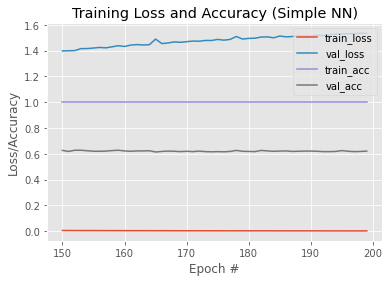

In [38]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N[150:], H.history["loss"][150:], label="train_loss")
plt.plot(N[150:], H.history["val_loss"][150:], label="val_loss")
plt.plot(N[150:], H.history["accuracy"][150:], label="train_acc")
plt.plot(N[150:], H.history["val_accuracy"][150:], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [39]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model/assets
